# Исследование рынка видеоигр

В нашем распоряжении исторические данные о продажах игр, оценик пользователей и экспертов, жанры и платформы.

Нам необходимо выявить закономерности, определяющие успешность игры. Выявление таких закономерностей позволит сделать ставку на потенциально популярный продукт и спланировать рекаламные компании.

Имеются данные до 2016 года. В наборе данных есть аббревиатура ESRD (Entertainment Software Rating Board) - это ассоциация, определяющая возрастной рейтинг компьютерных игр, например, "Для взрослых" или "Для детей младшего возраста".

#### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

## Изучение данных из файлов

### Датасет, информация, распределения и дубликаты

Размер датасета: (16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
5%,1996.000000,0.000000,0.000000,0.000000,0.000000,43.000000
10%,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
90%,2014.000000,0.610000,0.350000,0.170000,0.100000,85.000000


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

Явный дубликаты: 0


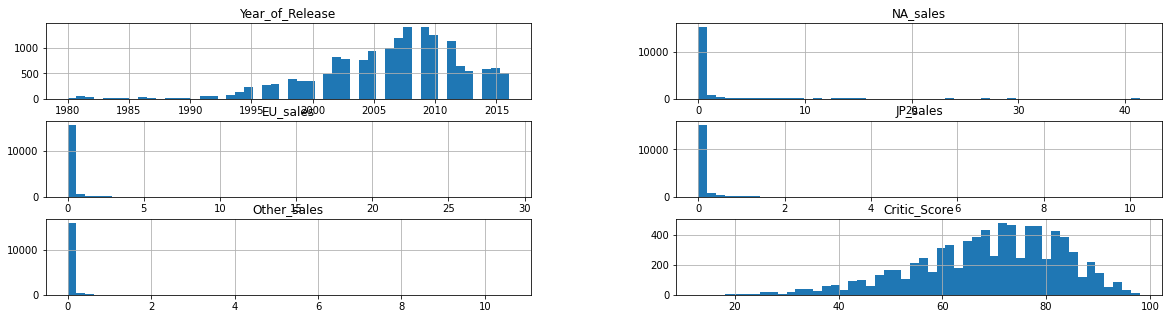

In [3]:
print('Размер датасета:',data.shape)
display(data.head(10)),
display(data.info()),
display(data.describe(percentiles=[0.05, 0.1, 1/4, 1/2, 3/4, 0.9, 0.95, 0.99]))
display(data.hist(bins = 50, figsize = (20,5)))
print('Явный дубликаты:', data.duplicated().sum())

### Расшифровка

**Датасет**

Предствлен датасет размером 16715 записей и 11 столбцов:
- `Name` - название игры | (Имя) | object | Есть неопределенные значения

    Необходимо:
        1. Изучить пропущенные значения и оценить их влияние на последующее исследование;

- `Year_of_Release` - год выпуска| (Имя) | float | Есть неопределенные значения

    Необходимо:
        1. Изменить формат на int;
        
- `Genre` - жанр игры | (Имя) | object | Есть неопределенне значения;

    Необходимо:
        1. Изменить формат столбца на string;
        2. Изучить пропущенные значения и оценить их влияние на последующее исслелодание;
        
- `NA_sales` - продажи в Северной Америке | (млн. штук) | float | Нет неопределенных значений;
    
    Необходимо:
        1. Изучить выброс. Предполагается, что выброс связан с малым объемом бестселлеров или распростанением игр определенного жанра в регионе;
        
- `EU_sales` - продажи в Европе | (млн. штук) | float | Нет неопределенных значений;
    
    Необходимо:
        1. Изучить выброс. Предполагается, что выброс связан с малым объемом бестселлеров или распростанением игр определенного жанра в регионе;  
        
- `JP_sales` - продажи в Японии | (млн. штук) | float | Нет неопределенных значений;

    Необходимо:
        1. Изучить выброс. Предполагается, что выброс связан с малым объемом бестселлеров или распростанением игр определенного жанра в регионе;
        
- `Other_sales` - продажи в других странах | (млн. штук) | float| Нет неопределенных значений;

    Необходимо:
        1. Изучить выброс. Предполагается, что выброс связан с малым объемом бестселлеров;
        
- `Critic_score` - оценка критиков | (оценка) | float | Есть неопределенные значения;
     
    Необходимо:
        Изучить выброс. Предполагается, что выброс связан с большим объемом игр с низким рейтингом;
     
- `User_score` - оценка пользователей | (оценка) | object | Есть неопределенные значения;
     
    Необходимо:
         1. Изменить формат столбца на float;
         2. Изучить выброс. Предполагается, что выброс связан с большим объемом игр с низким рейтингом; 
         
- `Rating` - возрастной рейтинг | (буквенный рейтинг)| Есть неопределенные значения.
    
    Необходимо:
        1. Изменить формат столбца на float.

### Неявные дубликаты

**Имя**

In [4]:
data['Name'].duplicated().sum()

5155

Этими дубликатами могут оказаться игры, выходившие на нескольких платформах

**Платформа**

In [5]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов нет

**Имя и платформа**

In [6]:
data[['Name', 'Platform']].duplicated().sum()

5

In [7]:
data[data[['Name', 'Platform']].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Обнаружено 5 неявных дубликатов, где повторяются имя продукта и платформа выпуска.

**Жанр**

In [8]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Дубликатов нет

**Имя, платформа и жанр**

In [9]:
data[['Name', 'Platform', 'Genre']].duplicated().sum()

5

In [10]:
data[data[['Name', 'Platform', 'Genre']].duplicated(keep='last')]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T


- Need for Speed: Most Wanted - игра имеет два издания - 2005-го и 2012-го годов и на Xbox 360, и на PC;
- Madden NFL 13 - один из дубликатов имеет продажи только для европейского рынка, состаяющие 10 тыс. копий;
- Sonic the Hedgehog - имеются две записи, каждая датирована 2006 годом, но у одной отсутствует жанр. Помимо этого, в записях имеется информация только о продажах на европейском рынке. Столбцы рейтинга и отзывов одинаковы.
- NaN - игра с неопрделенными значениями. Эти записи будут удалены.

### Вывод

1. Найдены неопределенные значения в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_score` и `Rating`. Необходимо изучить их и сделать предположение их возникновения. Явные дубликаты отсутствуют;
2. Необходимо привести названия столбцов к змеиному регистру;
3. Необходимо изменить форматы данных в столбцах `Genre` (string), `User_score` (float), `Rating` (string);
4. Изучить распределения данных и выбросы;
5. Определены неявные дубликаты.

## Подготовка данных

In [11]:
# Копируем исходный датасет в переменную df
df = data.copy()
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена названий столбцов

Названия столбцов не соответствуют змеиному регистру. Необходимо привести их к нижнему регистру

In [12]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Необходимо изменить форматы данных в столбцах `name` (string), `platform` (string), `genre` (string), `user_score` (float), `rating` (string)

### Имя, платформа и жанр

Были обнаружены пропуски в столбцах `name` и `genre`

In [13]:
# вывести строки датафрема с NaN в столбце 'name'
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных строках преобладают неопределенные значения. Судя по содержанию, данные были объеденены. Так основную информацию об игре содержит одна БД, о продажах и оценках и рейтинге - другие.

Эти строки будут удалены, так как потеря этих данных не скажется на дальнейшем исследовании

In [14]:
df = df.dropna(subset = ['name']).reset_index(drop = True)
df.shape

(16713, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Неявные дубликаты

Как было отмечено ранее, были обнаржены неявные дубликаты, часть из которых была удаления ранее

In [16]:
print('Осталось дубликатов:', df[['name', 'platform']].duplicated().sum())

Осталось дубликатов: 4


In [17]:
display(df[df[['name', 'platform']].duplicated()])
display(df[df[['name', 'platform']].duplicated(keep = 'last')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4126,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11714,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16228,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1744,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T


**Need for Speed**

Хоть записи и имеют одикановые оценки от пользователей и критиков, но являются разными релизами и имеют разные продажи. Заменим имя записи 2012 года, прибавив "2012"

In [18]:
df.loc[(df['name'] == 'Need for Speed: Most Wanted') & (df['year_of_release'] == 2012), 'name'] = 'Need For Speed: Most Wanted 2012'

In [19]:
display(df[df[['name', 'platform']].duplicated()])
display(df[df[['name', 'platform']].duplicated(keep = 'last')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4126,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.0,0.0,43.0,4.1,E10+
16228,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1744,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+


**Madden NFL 13**

Предполагается, что запись из строки 16228 является ошибочной, так как отсутствуют продажи на всех рынках, кроме европейского, а его значение достигает 0.01. Ударяем это запись

In [20]:
df = df[ df.index != 16228].reset_index(drop = True)

In [21]:
display(df[df[['name', 'platform']].duplicated()])
display(df[df[['name', 'platform']].duplicated(keep = 'last')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4126,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.0,0.0,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1744,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+


**Sonic the Hedgehog**

В строке 1744 в столбце с количеством европейским продаж вставим значение из строки 4126, так как это строка может являться обновленными данными по продажам на европейском рынке. А саму строку удалим.

In [22]:
df.loc[df.index == 1744, 'eu_sales'] = df.loc[df.index == 4126, 'eu_sales']
df = df[ df.index != 4126].reset_index(drop = True)

In [23]:
df[df.index == 1744]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1744,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,NaN,0.04,0.66,43.0,4.1,E10+


In [24]:
display(df[df[['name', 'platform']].duplicated()])
display(df[df[['name', 'platform']].duplicated(keep = 'last')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Неявные дубликаты отсутствуют

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       10012 non-null  object 
 10  rating           9947 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Год релиза

In [26]:
df['year_of_release'].isna().sum()/len(df['year_of_release'])

0.01603734067380767

Строки с пропущенными значениями в столбце `year_of_release` составляют 1,6%. Удалим эти данные, так как итоговая потеря данных не составит оптимального уровня потерь - 5%.

In [27]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop = True)
df.shape

(16443, 11)

In [28]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [29]:
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


### Оценка критиками, пользователями и рейтинг

In [31]:
df['critic_score'].sort_values(ascending=False).unique()

array([98., 97., 96., 95., 94., 93., 92., 91., 90., 89., 88., 87., 86.,
       85., 84., 83., 82., 81., 80., 79., 78., 77., 76., 75., 74., 73.,
       72., 71., 70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60.,
       59., 58., 57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47.,
       46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34.,
       33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 21., 20.,
       19., 17., 13., nan])

Удаление неопределенных значений приведет к искажению данных

In [32]:
df['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Таблице встречается аббревиатура "tbd", означающая "to be defined" - "подлежит определению". Заменим значение "tbd" на NaN

In [33]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16423,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16425,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16426,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16432,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [34]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

In [35]:
df['user_score'] = df['user_score'].astype('float')

Рассмотрим рейтинг ESRB

In [36]:
df['rating'].sort_values(ascending=False).unique()

array(['T', 'RP', 'M', 'K-A', 'EC', 'E10+', 'E', 'AO', nan], dtype=object)

- `T` - 13+;
- `RP` - Рейтинг не присвоен;
- `M` - 17+;
- `K-A` - для всех возрастов (действовал до 1998 г. - теперь E)
- `EC` - 3+;
- `E10+` - 10+;
- `E` - для всех возрастов;
- `AO` - 18+.

Заменим `K-A` на E, а неопределенные значения на `RP`.

In [37]:
df['rating'].isna().sum()

6676

In [38]:
df['rating'] = df['rating'].str.replace('K-A', 'E')
df['rating'] = df['rating'].fillna(value = 'RP')

In [39]:
df['rating'] = df['rating'].astype('string')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  string 
dtypes: float64(6), int64(1), object(3), string(1)
memory usage: 1.4+ MB


### Глобальные продажи

Добавим столбец `total_sales`

In [41]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  string 
 11  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(3), string(1)
memory usage: 1.5+ MB


### Вывод

1. Имена столбцов были приведены к нижнему регистру;
2. Были удалены записи с пропусками в столбцах `name`, `genre`, `year_of_release` - потеря данных составила 1,6%;
3. В столбце `user_score` были заменены значения "to be defined" на неопределенные значения;
4. В столбце `rating` была заменена старая категория на новую, неопределенные значения были заменены на категорию, означающую "рейтинг не присвоен";
5. Были изменены форматы столбцов.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные периоды

In [42]:
df['year_of_release'].describe(percentiles=[0.05, 0.1, 1/4, 1/2, 3/4, 0.8, 0.85, 0.9, 0.95, 0.99])

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
5%        1996.000000
10%       1999.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
80%       2011.000000
85%       2012.000000
90%       2014.000000
95%       2015.000000
99%       2016.000000
max       2016.000000
Name: year_of_release, dtype: float64

Text(0.5, 1.0, 'Количество выпущенных игр по годам')

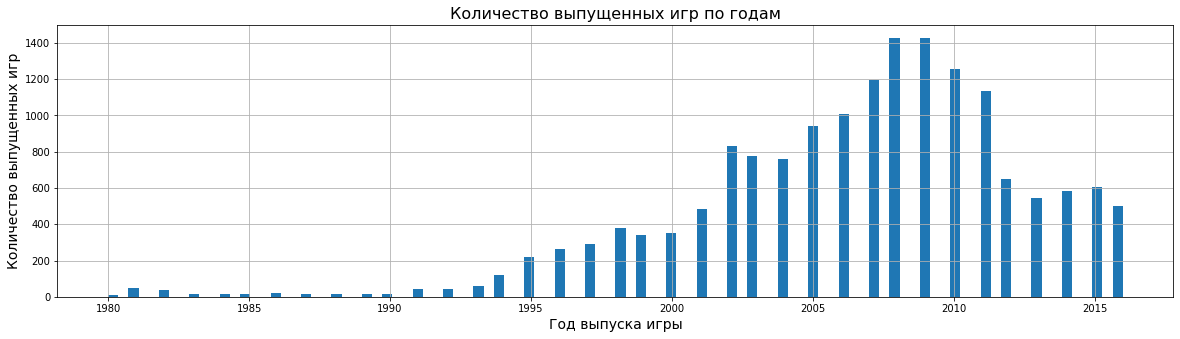

In [43]:
df['year_of_release'].hist(bins=100, figsize = (20,5))
plt.xlabel('Год выпуска игры', size = 14)
plt.ylabel('Количество выпущенных игр', size =14)
plt.title('Количество выпущенных игр по годам', size = 16)

**Удаление старого периода**

Количество выпускаемых игр в год до 1994 не достигает 100. По этой причине данные за этот год можно считать устаревшими.

In [44]:
print('Предполагаемая потеря записей:', len(df[df['year_of_release']<1994])/len(data))

Предполагаемая потеря записей: 0.021836673646425366


In [45]:
print('Потеря записей с начала обработки датасета:', 1 - (len(df)/len(data)))

Потеря записей с начала обработки датасета: 0.016272808854322474


На данный момент потеря записей составляет 3.8%, что не противоречит оптимальному критерию потери записей в 5%.

**Анализ**

Основной объем игры из БД выпускался с 2003 года по 2012 год. После 2012-го года наблюдается падение по количеству выпущенных игр.

По графику видно, что после 1980 до 1995 количество игр в год было минимальным. Это может быть связано с нераспространенностью игровых устройств в эти годы.

In [46]:
df = df[df['year_of_release']>1993]

Как видно из графика, периоды развития видеоигровой индустрии до 2016 можно разделить на периоды:
 - 1980 - 1994: зарождение индустрии - стабильное, но малое количество выпускаемых игр в год;
 - 1995 - 2002: медленный рост количества игр, связанный с популяризацией индустрии, с плато в период с 1999 по 2001;
 - 2003 - 2007: резкий рост, по сравнению с прошлым периодом с плато в начале (2003-2005)
 - 2008 - 2012: достижение пиковых значений и постепенный спад;
 - 2013 - 2016: резкий спад выпуска игр.

При этом можно проследить связь количества выпускаемых игр с фактом выхода игровых консолей. Так:
1. В 2000 была выпущена PS2;
2. В 2006/2007 PS3 и Xbox 360 - в 2005;
3. В 2013 PS4 и Xbox One.

Так в (1) за выпуском консолей последовал рост количества выпускаемых игр в год. В (2) резкий рост. В (3) падение количества выпускаемых игр далее. Этот факт может быть связан с изучением и адаптацией игровых студий к платформе, ведь  для выпуска игр на новые консоли требуется изучение новой платформы и создание или адаптация движков, на которых строятся игры.

Проверим данную теорию

In [47]:
#создание сводной таблицы по кол-ву игр в год от платформы
year_releases_platform = df.pivot_table(index = ['platform'],
                                       values = 'total_sales',
                                        columns = 'year_of_release',
                                       aggfunc = 'count',
                                       fill_value = 0,
                                       margins = True).reset_index()
year_releases_platform = year_releases_platform[:-1]
year_releases_platform = year_releases_platform.rename_axis('index', axis = 'columns')
#проверка на пропуски
print('Кол-во пропущенных значений:', year_releases_platform.isna().sum().sum())

Кол-во пропущенных значений: 0


Text(0.5, 1.0, 'Распределение выпущенных игр по годам в зависимости от платформы')

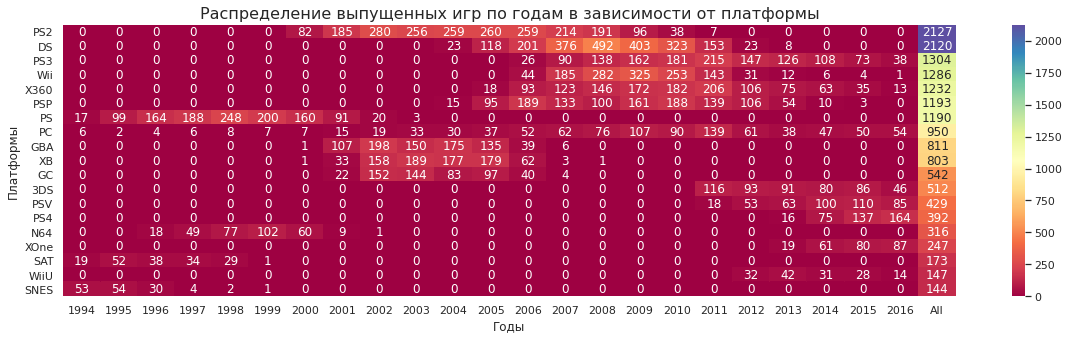

In [48]:
sns.set(rc={'figure.figsize':(20,5)})
sns.heatmap(
    (year_releases_platform[year_releases_platform['All']>100]  #суммарное кол-во игр больше 100
     .set_index('platform')                                     #платформа=индекс
     .sort_values(by='All',ascending = False)                   #сортировать по суммарному кол-ву
    ),
    cmap = 'Spectral',
    annot = True,
    fmt='d')

plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.title('Распределение выпущенных игр по годам в зависимости от платформы', size = 16)

Text(0.5, 1.0, 'Количество выпущенных игр по годам')

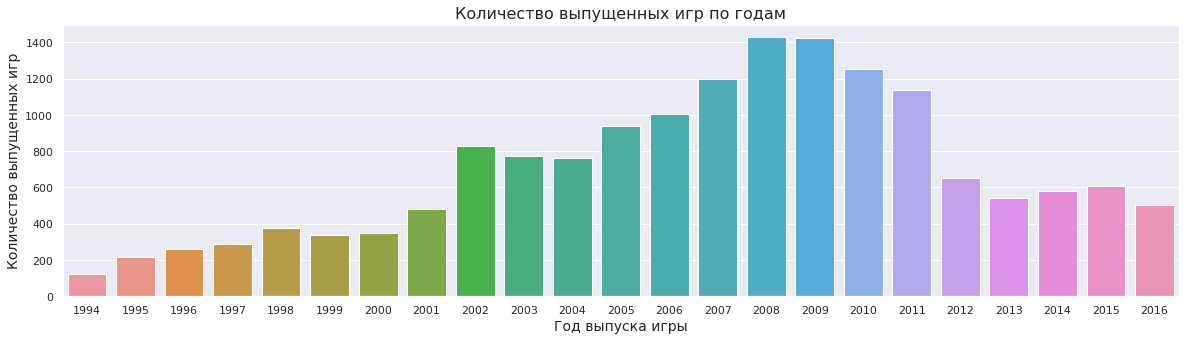

In [49]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = ( 
    df.pivot_table(index = 'year_of_release',
                   values = 'name',
                   aggfunc = 'count')).reset_index(),
            x = 'year_of_release',
            y = 'name'
           )

plt.xlabel('Год выпуска игры', size = 14)
plt.ylabel('Количество выпущенных игр', size =14)
plt.title('Количество выпущенных игр по годам', size = 16)

1. 1994-1999 г.: медленный подъем - выпуск игр на платформы PlayStation, Nintendo 64, Sega Saturn и Super Nintendo;
2. 2000-2001 г.: переходный этап - затухающее продолжение выпуска игр на предыдущее поколение и появление платформ PlayStation 2, Game Boy Advance, Xbox, Nintendo GameCube;
3. 2002-2003 г.: полный переход на платформы, появившиеся в 2000-2001 годах;
4. 2004-2005 г.: продолжение прошлого периода и появление мобильных консолей PlayStation Portable и Nintendo DS;
5. 2006-2007 г.: затухающая разработка на всех платформах 2000-2001 годов, появление платформ PlayStation 3, Wii и Xbox 360 и резкое возрастание разработки игр для Nintendo DS;
6. 2008-2010: разработка игр на платформы Playstation 3, Wii и Xbox 360, продолжение популярности мобильных консолей PlayStation Portable и Nintendo DS;
7. 2011-2012 г.: затухающая разработка игр на стационарные платформы, появление новых мобильных консолей PlayStation Vita и Nintendo 3DS;
8. 2013-2016 г.: появление платформ PlayStation 4, Xbox One и Wii U.

Отдельно стоит выделить платформу PC (персональный компьютер), являющуюся самой долгоживущей платформой.

Text(0.5, 1.0, 'Количество выпущенных игр по годам на платформу PC')

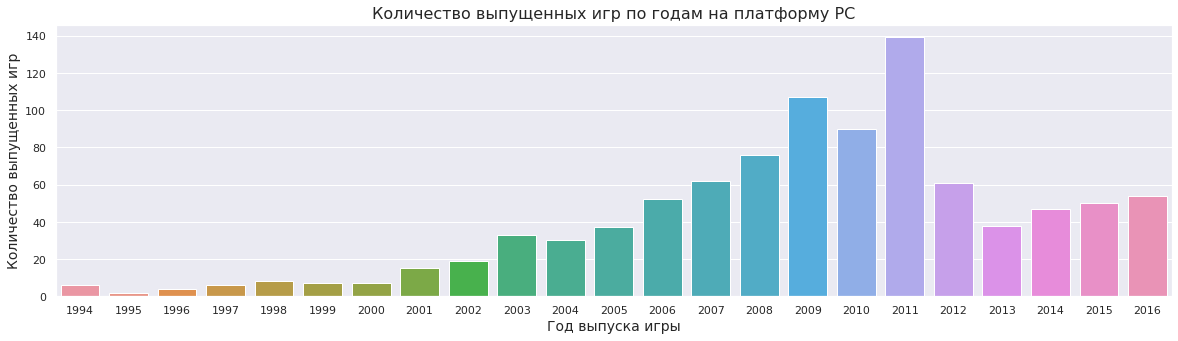

In [50]:
sns.barplot(data = ( 
    df[df['platform']=='PC'].pivot_table(index = 'year_of_release',
                   values = 'name',
                   aggfunc = 'count')).reset_index(),
            x = 'year_of_release',
            y = 'name'
           )
plt.xlabel('Год выпуска игры', size = 14)
plt.ylabel('Количество выпущенных игр', size =14)
plt.title('Количество выпущенных игр по годам на платформу PC', size = 16)

Тенденция разработки игр на данную платформу имеет отношение к тенденции разработки игр на стационарные игровые консоли, например PlayStation 3. Большинство игр первоначально разрабатывают именно для игровых консолей, а затем на базе этой разработки на платформу PC.
C каждым появлением новых игровых консолей разработка игры на PC увеличивается. Это может быть связано с тем, что конфигурация игровых консолей не изменяется, т.е. технические элементы в ней нельзя заменить в то время, как конфигурация PC может постоянно обновляться.

Что касается общего количества игр, то наблюдается зависимость повышения количества выпускаемых игр с каждым выходом новых платформ, однако эта зависимость прослеживается только до 2011 года. В 2012 наблюдается резкое падение количества разрабатываемых игр, что может быть связано с подготовкой игровых студий к выходу новых игровых платформ.

В 2013 году появляются новые игровые платформы, однако количество выпускаемых игр в последующие годы не достигает тех значений, что прежде. Это может быть связано с тем, что игровые студии начали выпускать более большие проекты, включающие в себя продвинутые технологии и, соответственно, требующие больших ресурсов.

### Изменение продаж по платформам

Рассмотрим связь количества выпускаемых игр по годам с их выходом на игровых платформах

In [51]:
#создание сводной таблицы по продажам игр в год от платформы
year_sales_platform = df.pivot_table(index = ['platform'],
                                       values = 'total_sales',
                                        columns = 'year_of_release',
                                       aggfunc = 'sum',
                                       fill_value = 0,
                                       margins = True).reset_index()
year_releases_platform = year_releases_platform[:-1]
year_releases_platform = year_releases_platform.rename_axis('index', axis = 'columns')
#проверка на пропуски
print('Кол-во пропущенных значений:', year_releases_platform.isna().sum().sum())

Кол-во пропущенных значений: 0


Text(0.5, 1.0, 'Распределение продаж выпущенных игр по годам в зависимости от платформы')

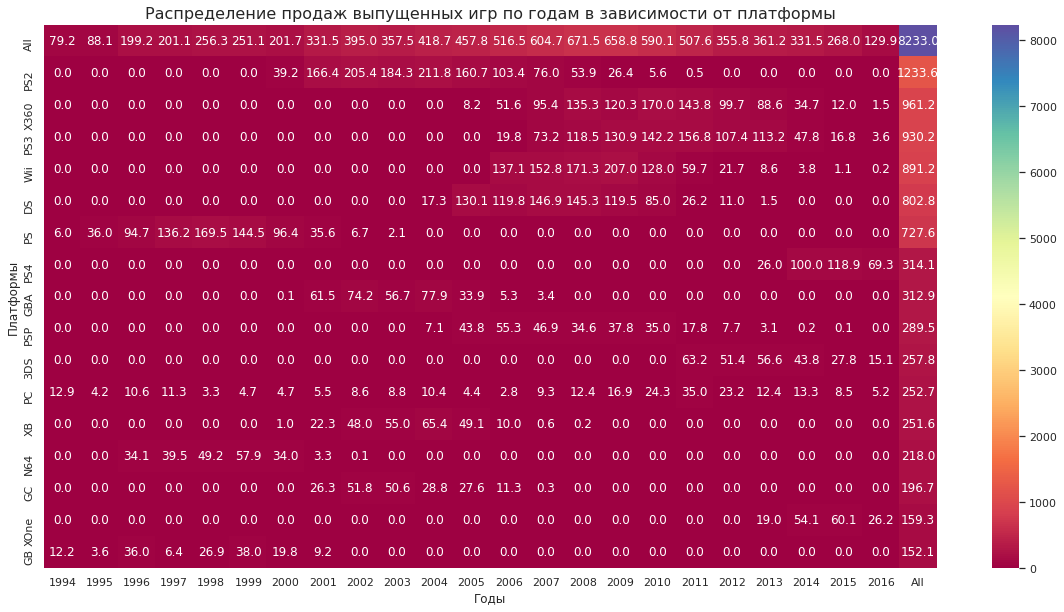

In [52]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap((year_sales_platform[year_sales_platform['All']>100]
             .set_index('platform')
             .sort_values(by='All',ascending = False)
            ),
            cmap = 'Spectral',
            annot = True,
            fmt='.1f')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.title('Распределение продаж выпущенных игр по годам в зависимости от платформы', size = 16)

In [53]:
#Топ плафторм
year_releases_platform.sort_values(by = 'All', ascending = False)[['platform', 'All']].head(10)

index,platform,All
14,PS2,2127
3,DS,2120
15,PS3,1304
24,Wii,1286
26,X360,1232
17,PSP,1193
13,PS,1190
11,PC,950
5,GBA,811
27,XB,803


В топ платформ по количеству проданных копий входят:
1. PS2, 2000-2011 г.: 1233.56 млн. копий;
2. Xbox 360, 2005-2016 г.: 961.24 млн. копий;
3. PS3, 2006-2016 г.: 931.34 млн. копий;
4. Wii, 2006-2016 г.: 891.18 млн. копий;
5. DS, 2004-2012 г.: 802.76 млн. копий;
6. PS, 1994-2003 г.: 727.58 млн. копий;
7. PS4, 2013-2016 г.: 314.14 млн. копий;
8. GBA, 2000-2007 г.: 312.88 млн. копий;
9. PSP, 2004-2016 г.: 289.53 млн. копий;
10. 3DS, 2011-2016 г.: 257.81 млн. копий.

#### Продолжительность существования платформ

Создадим сводную таблицу для оценки времени существования платформ. При этом стоит учесть тот факт, что игры могли выходить в начале года и в конце, а в следующем году уже нет. В данном случае следует добавлять единицу к длительности существования платформ.

In [54]:
#сводная таблица
lifetime = df.pivot_table(index = 'platform',
                         values = 'year_of_release',
                         aggfunc = ['min', 'max']).reset_index()
lifetime.columns = ['platform', 'first_year', 'last_year']
lifetime['lifetime'] = lifetime['last_year'] - lifetime['first_year']+1
lifetime

,platform,first_year,last_year,lifetime
0,3DO,1994,1995,2
1,3DS,2011,2016,6
2,DC,1998,2008,11
3,DS,2004,2013,10
4,GB,1994,2001,8
5,GBA,2000,2007,8
6,GC,2001,2007,7
7,GEN,1994,1994,1
8,N64,1996,2002,7
9,NES,1994,1994,1


Text(0, 0.5, 'Годы существования')

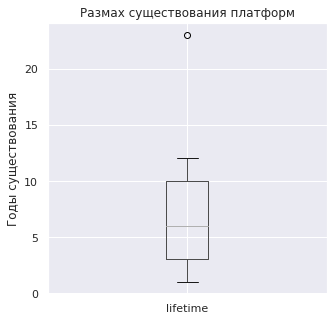

In [55]:
lifetime.boxplot(column='lifetime', figsize = (5,5))
plt.title('Размах существования платформ')
plt.ylabel('Годы существования')

В сводной таблице присутствует платформа PC, являющаяся актуальной до сих пор, которая будет искажать данные.

In [56]:
round(lifetime[lifetime['platform']!='PC']['lifetime'].describe(percentiles=[0.05, 0.1, 1/4, 1/2, 3/4, 0.8, 0.85, 0.9]), 1)

count    28.0
mean      6.4
std       3.8
min       1.0
5%        1.0
10%       1.0
25%       3.0
50%       6.0
75%      10.0
80%      10.6
85%      11.0
90%      11.3
max      12.0
Name: lifetime, dtype: float64

В основном все платформы, кроме PC, существуют от 3 до 10 лет. В среднем - 6 лет.

### Выбор актуального периода и платформ для анализа

Отфильтруем данные для создания списка актуальных платформ. В этот список не должны входить платформы, количество выпускаемых игр которых в последний год равно нулю. Также платформы, которые существуют более 6 лет, вероятнее всего, теряют свою актуальность. 

In [57]:
#срок существования 6 и меньше лет, а игры выходят до сих пор - 2016
actual_platforms = list(lifetime[(lifetime['lifetime'] <= 6) &
                                 (lifetime['last_year'] == 2016) ].platform)
#добавим PC
actual_platforms.append('PC')
actual_platforms

['3DS', 'PS4', 'PSV', 'WiiU', 'XOne', 'PC']

сформируем датасет для актуальных платформ. Актуальный период для динамичного бизнеса составляет 2-3 года - по этой причине выбираем нижним пределом 2014 год, так как сейчас конец 2016-го

In [58]:
df_actual = df.query('year_of_release >= 2014 and platform in @actual_platforms')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 31 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1335 non-null   object 
 1   platform         1335 non-null   object 
 2   year_of_release  1335 non-null   int64  
 3   genre            1335 non-null   object 
 4   na_sales         1335 non-null   float64
 5   eu_sales         1335 non-null   float64
 6   jp_sales         1335 non-null   float64
 7   other_sales      1335 non-null   float64
 8   critic_score     656 non-null    float64
 9   user_score       705 non-null    float64
 10  rating           1335 non-null   string 
 11  total_sales      1335 non-null   float64
dtypes: float64(7), int64(1), object(3), string(1)
memory usage: 135.6+ KB


In [59]:
#создание сводной таблицы по продаже игр в год от актуальных платформ
sales_actual_platform = df_actual.pivot_table(index = 'platform',
                                       values = 'total_sales',
                                        columns = 'year_of_release',
                                       aggfunc = 'sum',
                                       fill_value = 0,
                                       margins = True).reset_index()
sales_actual_platform = sales_actual_platform[:-1]
sales_actual_platform = sales_actual_platform.rename_axis('index', axis = 'columns')
#проверка на пропуски
print('Кол-во пропущенных значений:', sales_actual_platform.isna().sum().sum())

Кол-во пропущенных значений: 0


Text(0.5, 1.0, 'Распределение продаж выпущенных игр по годам в зависимости от платформы в актуальном периоде')

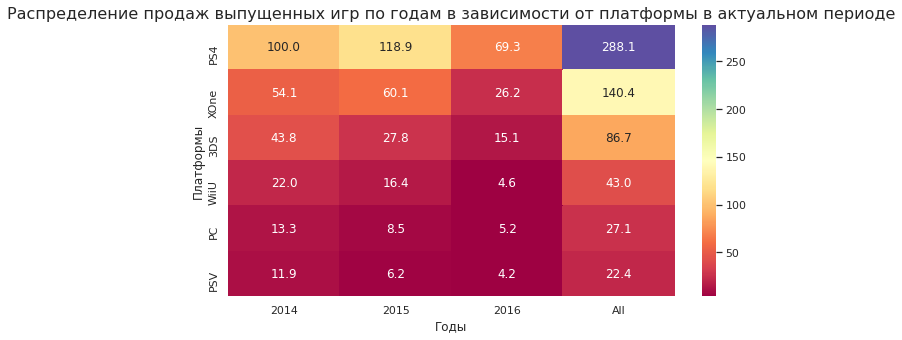

In [60]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap((sales_actual_platform
             .set_index('platform')
             .sort_values(by='All',ascending = False)
            ),
            cmap = 'Spectral',
            annot = True,
            fmt='.1f')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.title('Распределение продаж выпущенных игр по годам в зависимости от платформы в актуальном периоде', size = 16)

На данный момент существует 6 актуальных платформ:

In [61]:
sales_actual_platform.sort_values(by='All',ascending = False)['platform']

2     PS4
5    XOne
0     3DS
4    WiiU
1      PC
3     PSV
Name: platform, dtype: object

In [62]:
df_actual = df.query('year_of_release >= 2014 & platform in @sales_actual_platform["platform"]')
#проверка
display(df_actual.info())
display(df_actual['platform'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 31 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1335 non-null   object 
 1   platform         1335 non-null   object 
 2   year_of_release  1335 non-null   int64  
 3   genre            1335 non-null   object 
 4   na_sales         1335 non-null   float64
 5   eu_sales         1335 non-null   float64
 6   jp_sales         1335 non-null   float64
 7   other_sales      1335 non-null   float64
 8   critic_score     656 non-null    float64
 9   user_score       705 non-null    float64
 10  rating           1335 non-null   string 
 11  total_sales      1335 non-null   float64
dtypes: float64(7), int64(1), object(3), string(1)
memory usage: 135.6+ KB


None

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'], dtype=object)

### Распределение продаж актуальных платформ

(0.0, 4.0)

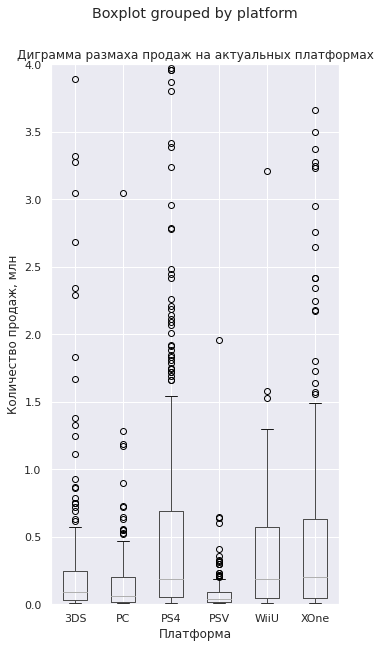

In [63]:
df_actual.boxplot(column='total_sales', by = 'platform', figsize = (5, 10))

plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн')
plt.title('Диграмма размаха продаж на актуальных платформах')
plt.ylim(0, 4)

In [64]:
#функция для вывода перцентилей продаж по платформе
def actual_sales_info (platform):
    return (df_actual[df_actual['platform'] == platform]['total_sales'].describe())

**Для PC**

In [65]:
actual_sales_info('PC')

count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: total_sales, dtype: float64

В основном на PC продалось от 20 до 200 тыс. игровых копий каждой игры. При этом медианное число продаж составлет 60 тыс. копий.

**Для PS4**

In [66]:
actual_sales_info('PS4')

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

В основном на PlayStation 4 продалось от 57.5 до 690 тыс. игровых копий каждой игры. При этом медианное число продаж составляет 185 тыс. копий.

**Для Xbox One**

In [67]:
actual_sales_info('XOne')

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

В основном на Xbox One продалось от 50 тыс. до 632.5 тыс. игровых копий каждой игры. При этом медианное число продаж составляет 205 тыс. копий

**Для Wii U**

In [68]:
actual_sales_info('WiiU')

count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: total_sales, dtype: float64

В основном на Wii U продалось от 50 тыс. до 570 игровых копий каждой игры. При этом медианное число продаж составляет 190 тыс. копий.

**Для Nintendo 3DS**

In [69]:
actual_sales_info('3DS')

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

В основном на 3DS продалось от 30 тыс. до 250 тыс. игровых копий каждой игры. При этом медианное число продаж составляет 90 тыс. копий.

**PlayStation Vita**

In [70]:
actual_sales_info('PSV')

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: total_sales, dtype: float64

В основном на PlayStation Vita продалось от 20 до 90 тыс. игровых копий каждой игры. При этом медианное число продаж составляет 40 тыс. копий.

Рассмотрим то, как ведут себя продажи и количество выпускаемых игр

In [71]:
sales_count = df_actual.pivot_table(index = ['year_of_release', 'platform'],
                                   values = 'total_sales',
                                   aggfunc = ['sum', 'count']).reset_index()
sales_count.columns = ['year_of_release', 'platform', 'total_sales', 'games_count']
sales_count

,year_of_release,platform,total_sales,games_count
0,2014,3DS,43.76,80
1,2014,PC,13.28,47
2,2014,PS4,100.00,75
3,2014,PSV,11.90,100
4,2014,WiiU,22.03,31
5,2014,XOne,54.07,61
6,2015,3DS,27.78,86
7,2015,PC,8.52,50
8,2015,PS4,118.90,137
9,2015,PSV,6.25,110


Text(0.5, 1.0, 'Продажи по актуальному периоду')

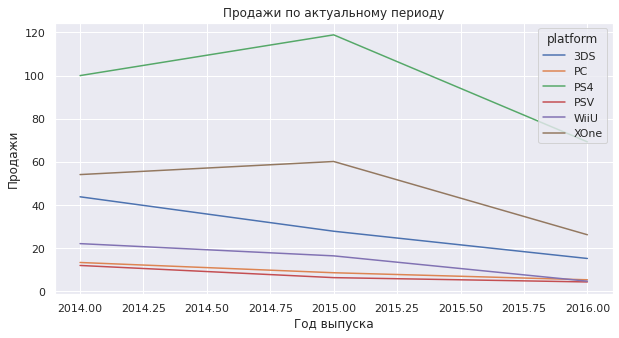

In [72]:
sns.lineplot(data = sales_count, x = 'year_of_release', y = 'total_sales', hue = 'platform')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.title('Продажи по актуальному периоду')

Text(0.5, 1.0, 'Количество игр по актуальному периоду')

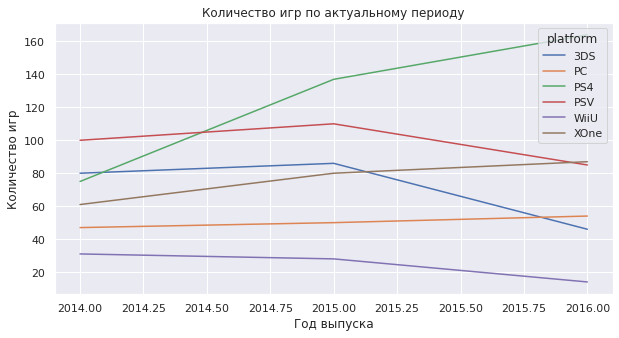

In [73]:
sns.lineplot(data = sales_count, x = 'year_of_release', y = 'games_count', hue = 'platform')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество игр по актуальному периоду')

В этом году на всех платформах наблюдается падение продаж. При этом количество выпускаемых игр на платформах PlayStation 4, Xbox One и PC растет. 

### Влияние отзывов пользователей и критиков на продажи  PlayStation 4

In [74]:
ps4 = df_actual[df_actual['platform'] == 'PS4']
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [75]:
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 31 to 16313
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    object 
 1   platform         376 non-null    object 
 2   year_of_release  376 non-null    int64  
 3   genre            376 non-null    object 
 4   na_sales         376 non-null    float64
 5   eu_sales         376 non-null    float64
 6   jp_sales         376 non-null    float64
 7   other_sales      376 non-null    float64
 8   critic_score     237 non-null    float64
 9   user_score       242 non-null    float64
 10  rating           376 non-null    string 
 11  total_sales      376 non-null    float64
dtypes: float64(7), int64(1), object(3), string(1)
memory usage: 38.2+ KB


**Влияние отзывов пользователей**

(0.0, 7.0)

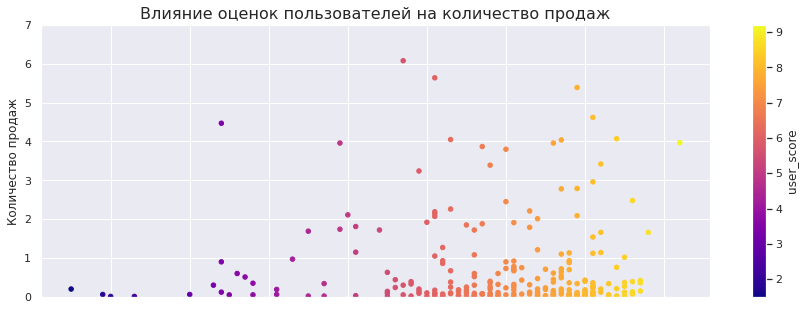

In [76]:
ps4.plot.scatter('user_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок пользователей на количество продаж', size = 16)
plt.ylim(0, 7)

In [77]:
print(f'Корреляция между оценкой пользователей и количеством продаж:{ps4.user_score.corr(ps4["total_sales"]):.2}')

Корреляция между оценкой пользователей и количеством продаж:-0.04


Нет корреляции между оценками пользователей и объемом продаж

**Влияние отзывов критиков**

(0.0, 7.0)

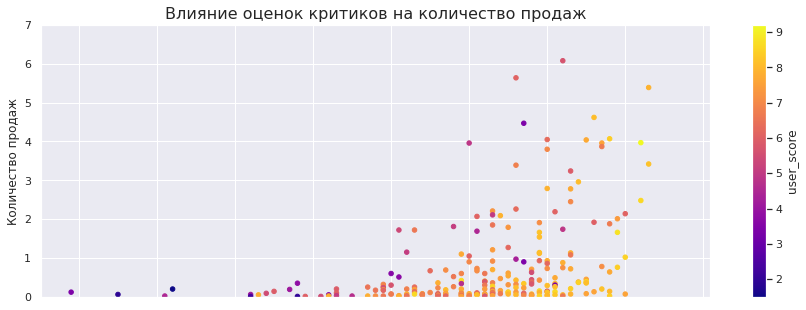

In [78]:
ps4.plot.scatter('critic_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок критиков на количество продаж', size = 16)
plt.ylim(0, 7)

In [79]:
print(f'Корреляция между оценкой критиков и количеством продаж: {ps4.critic_score.corr(ps4["total_sales"]):.2}')

Корреляция между оценкой критиков и количеством продаж: 0.4


Присутствует нелинейная корреляция между оценками критиков и объемом продаж. Чем выше оценка критиков, тем выше продажи игры

#### Соотношение с продажами на других платформах

##### Для Xbox One

In [80]:
xbox_one = df_actual[df_actual['platform'] == 'XOne']
display(xbox_one.head())
display(xbox_one.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,RP,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 99 to 16400
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             228 non-null    object 
 1   platform         228 non-null    object 
 2   year_of_release  228 non-null    int64  
 3   genre            228 non-null    object 
 4   na_sales         228 non-null    float64
 5   eu_sales         228 non-null    float64
 6   jp_sales         228 non-null    float64
 7   other_sales      228 non-null    float64
 8   critic_score     155 non-null    float64
 9   user_score       165 non-null    float64
 10  rating           228 non-null    string 
 11  total_sales      228 non-null    float64
dtypes: float64(7), int64(1), object(3), string(1)
memory usage: 23.2+ KB


None

(0.0, 7.0)

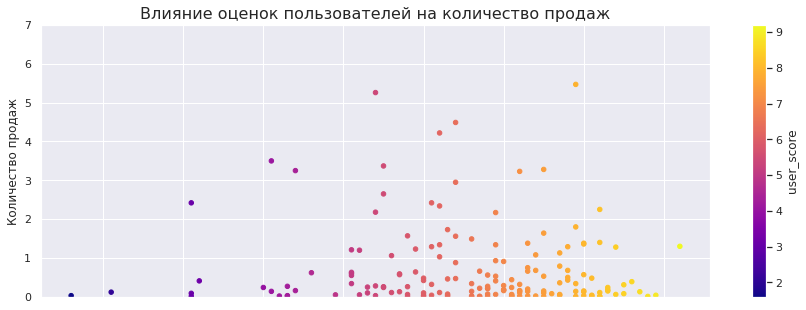

In [81]:
xbox_one.plot.scatter('user_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок пользователей на количество продаж', size = 16)
plt.ylim(0, 7)

In [82]:
print(f'Корреляция между оценкой пользователей и количеством продаж:{xbox_one.user_score.corr(xbox_one["total_sales"]):.2}')

Корреляция между оценкой пользователей и количеством продаж:-0.07


(0.0, 7.0)

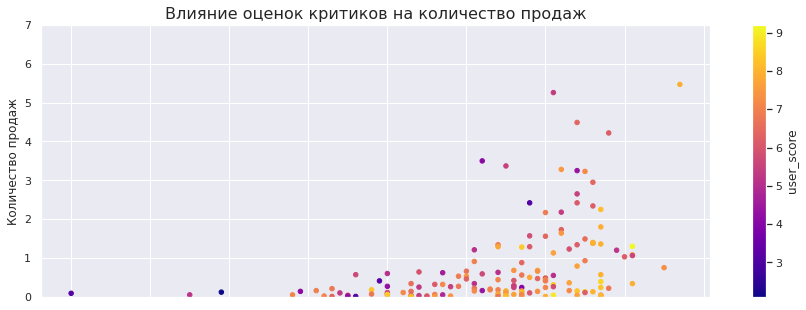

In [83]:
xbox_one.plot.scatter('critic_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок критиков на количество продаж', size = 16)
plt.ylim(0, 7)

In [84]:
print(f'Корреляция между оценкой критиков и количеством продаж: {xbox_one.critic_score.corr(xbox_one["total_sales"]):.2}')

Корреляция между оценкой критиков и количеством продаж: 0.43


Нет корреляции между оценками пользователей и продажами. Есть нелинейная корреляция между оценками критиками и количеством продаж

##### PC

In [85]:
pc = df_actual[df_actual['platform'] == 'PC']
display(pc.head())
display(pc.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
455,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1515,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1658,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,NaN,NaN,RP,1.19
1710,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2273,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 455 to 16420
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             151 non-null    object 
 1   platform         151 non-null    object 
 2   year_of_release  151 non-null    int64  
 3   genre            151 non-null    object 
 4   na_sales         151 non-null    float64
 5   eu_sales         151 non-null    float64
 6   jp_sales         151 non-null    float64
 7   other_sales      151 non-null    float64
 8   critic_score     116 non-null    float64
 9   user_score       122 non-null    float64
 10  rating           151 non-null    string 
 11  total_sales      151 non-null    float64
dtypes: float64(7), int64(1), object(3), string(1)
memory usage: 15.3+ KB


None

(0.0, 7.0)

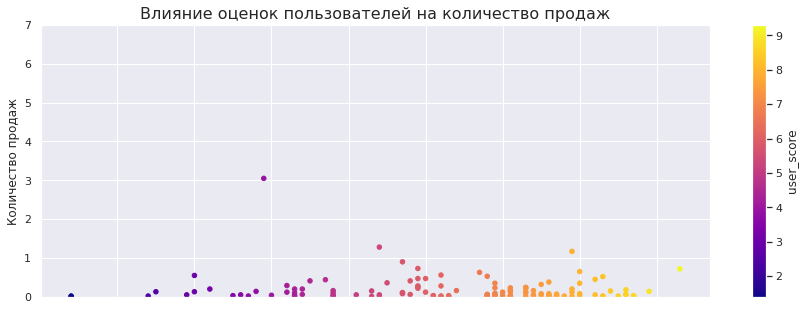

In [86]:
pc.plot.scatter('user_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок пользователей на количество продаж', size = 16)
plt.ylim(0, 7)

In [87]:
print(f'Корреляция между оценкой пользователей и количеством продаж:{pc.user_score.corr(pc["total_sales"]):.2}')

Корреляция между оценкой пользователей и количеством продаж:-0.072


(0.0, 7.0)

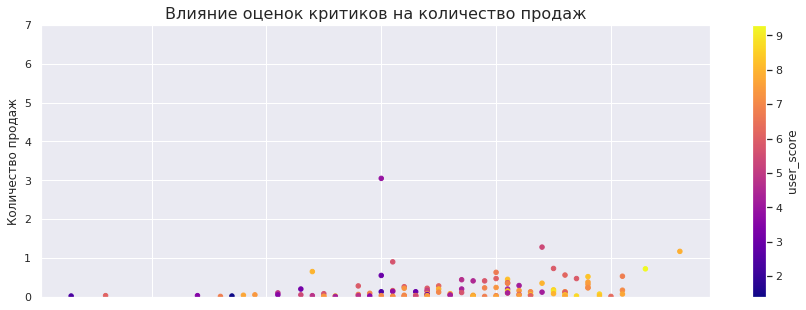

In [88]:
pc.plot.scatter('critic_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок критиков на количество продаж', size = 16)
plt.ylim(0, 7)

In [89]:
print(f'Корреляция между оценкой критиков и количеством продаж: {pc.critic_score.corr(pc["total_sales"]):.2}')

Корреляция между оценкой критиков и количеством продаж: 0.17


Нет корреляции между оценками пользователей и продажами. Есть малая корреляция между оценками критиков и количеством продаж

##### 3DS

In [90]:
tds = df_actual[df_actual['platform'] == '3DS']
display(tds.head())
display(tds.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,RP,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,RP,7.14
311,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
404,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,RP,3.32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 47 to 16405
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             212 non-null    object 
 1   platform         212 non-null    object 
 2   year_of_release  212 non-null    int64  
 3   genre            212 non-null    object 
 4   na_sales         212 non-null    float64
 5   eu_sales         212 non-null    float64
 6   jp_sales         212 non-null    float64
 7   other_sales      212 non-null    float64
 8   critic_score     51 non-null     float64
 9   user_score       55 non-null     float64
 10  rating           212 non-null    string 
 11  total_sales      212 non-null    float64
dtypes: float64(7), int64(1), object(3), string(1)
memory usage: 21.5+ KB


None

(0.0, 7.0)

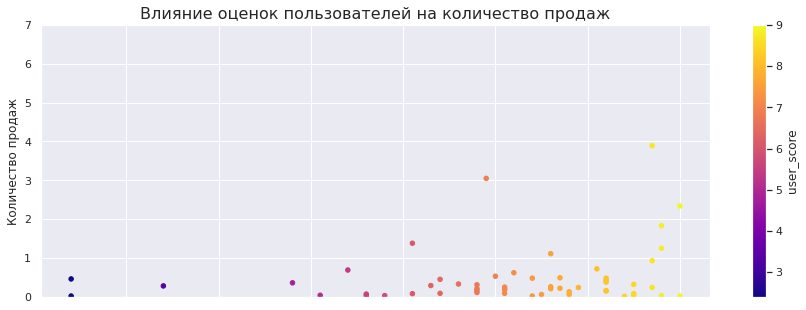

In [91]:
tds.plot.scatter('user_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок пользователей на количество продаж', size = 16)
plt.ylim(0, 7)

In [92]:
print(f'Корреляция между оценкой пользователей и количеством продаж:{tds.user_score.corr(tds["total_sales"]):.2}')

Корреляция между оценкой пользователей и количеством продаж:0.22


(0.0, 7.0)

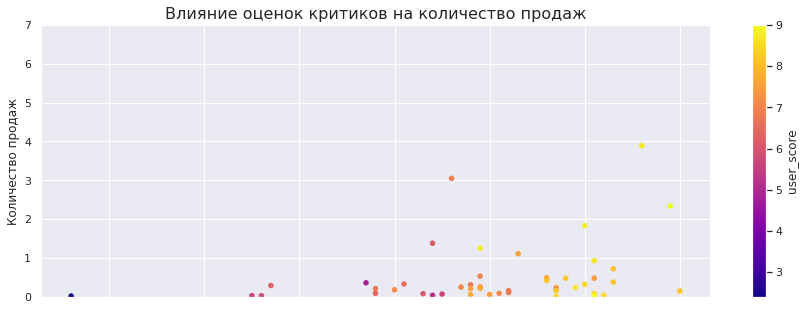

In [93]:
tds.plot.scatter('critic_score',
                      'total_sales',
                      figsize = (15,5),
                      c = 'user_score',
                      colormap = 'plasma')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Количество продаж')
plt.title('Влияние оценок критиков на количество продаж', size = 16)
plt.ylim(0, 7)

In [94]:
print(f'Корреляция между оценкой критиков и количеством продаж: {tds.critic_score.corr(tds["total_sales"]):.2}')

Корреляция между оценкой критиков и количеством продаж: 0.31


Есть малая корреляция между оценками пользователей и продажами. Есть малая корреляция между оценками критиков и количеством продаж

In [95]:
print(f'Корреляция между оценкой критиков и оценками пользователей: {tds.critic_score.corr(tds["user_score"]):.2}')

Корреляция между оценкой критиков и оценками пользователей: 0.86


Есть сильная корреляция между оценками критиков и оценками пользователей, что говорит о том, что оценки критиков и пользователей имеют практически одинаковую динамику.

### Общее распределение продаж игр по жанрам

In [96]:
genre_sales_median = df_actual.pivot_table(index = 'genre',
                                   values = 'total_sales',
                                   columns = 'year_of_release',
                                   aggfunc = 'median',
                                   fill_value = 0,
                                   margins = True).reset_index()
genre_sales_median = genre_sales_median[:-1]
genre_sales_median = (genre_sales_median
                        .rename_axis('index',  axis="columns")
                           .set_index('genre')
                           .sort_values(by='All', ascending=False)
                          )
print('Кол-во пропущенных значений:', genre_sales_median.isna().sum().sum())

Кол-во пропущенных значений: 0


Text(0.5, 1.0, 'Распределение медианных продаж выпущенных игр по годам в зависимости от жанров в актуальном периоде')

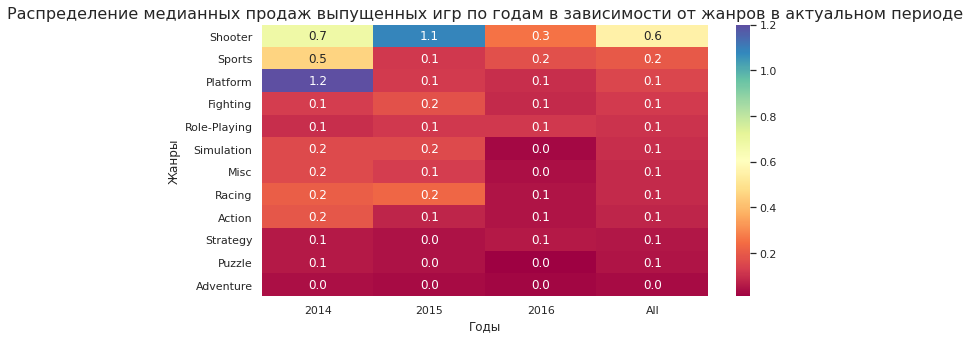

In [97]:
sns.heatmap(genre_sales_median,
           cmap = 'Spectral',
            annot = True,
            fmt = '.1f'
           )
plt.xlabel('Годы')
plt.ylabel('Жанры')
plt.title('Распределение медианных продаж выпущенных игр по годам в зависимости от жанров в актуальном периоде', size = 16)

In [98]:
genre_sales_mean = df_actual.pivot_table(index = 'genre',
                                   values = 'total_sales',
                                   columns = 'year_of_release',
                                   aggfunc = 'mean',
                                   fill_value = 0,
                                   margins = True).reset_index()
genre_sales_mean = genre_sales_mean[:-1]
genre_sales_mean = (genre_sales_mean
                        .rename_axis('index',  axis="columns")
                           .set_index('genre')
                           .sort_values(by='All', ascending=False)
                          )
print('Кол-во пропущенных значений:', genre_sales_mean.isna().sum().sum())

Кол-во пропущенных значений: 0


Text(0.5, 1.0, 'Распределение средних продаж выпущенных игр по годам в зависимости от жанров в актуальном периоде')

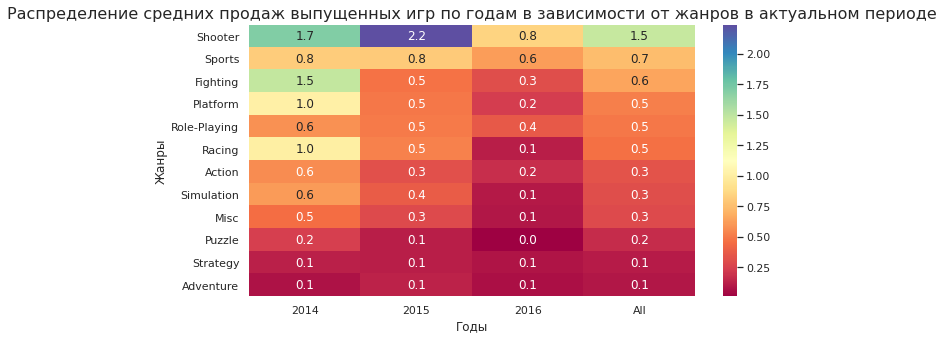

In [99]:
sns.heatmap(genre_sales_mean,
           cmap = 'Spectral',
            annot = True,
            fmt = '.1f'
           )
plt.xlabel('Годы')
plt.ylabel('Жанры')
plt.title('Распределение средних продаж выпущенных игр по годам в зависимости от жанров в актуальном периоде', size = 16)

In [100]:
genre_sales_count = df_actual.pivot_table(index = 'genre',
                                   values = 'total_sales',
                                   columns = 'year_of_release',
                                   aggfunc = 'count',
                                   fill_value = 0,
                                   margins = True).reset_index()
genre_sales_count = genre_sales_count[:-1]
genre_sales_count = (genre_sales_count
                        .rename_axis('index',  axis="columns")
                           .set_index('genre')
                           .sort_values(by='All', ascending=False)
                          )
print('Кол-во пропущенных значений:', genre_sales_count.isna().sum().sum())

Кол-во пропущенных значений: 0


Text(0.5, 1.0, 'Распределение количества выпущенных игр по годам в зависимости от жанров в актуальном периоде')

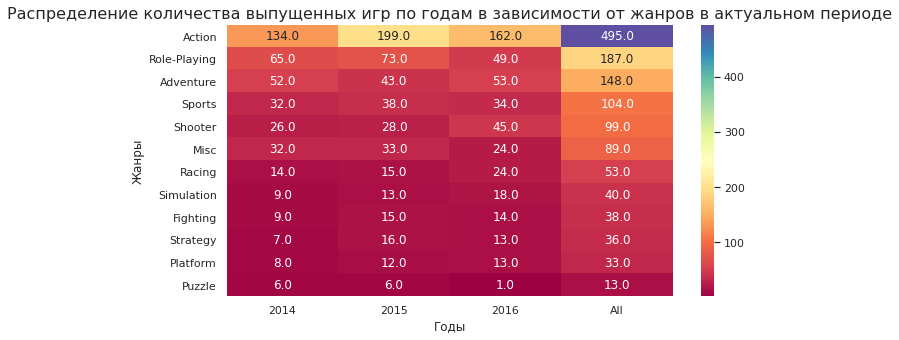

In [101]:
sns.heatmap(genre_sales_count,
           cmap = 'Spectral',
            annot = True,
            fmt = '.1f'
           )
plt.xlabel('Годы')
plt.ylabel('Жанры')
plt.title('Распределение количества выпущенных игр по годам в зависимости от жанров в актуальном периоде', size = 16)

Самые популярные жанры на данный момент:
1. Шутеры - продажи росли с 2014 по 2015, в этом году пошли на резкий спад, однако количество выпускаемых игр данного жанра увеличелось. Факт падения продаж может быть связан с выходом крупных игр;

In [102]:
df_actual.query('genre == "Shooter" and total_sales > 1 and year_of_release == 2016')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
244,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
288,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
324,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
634,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
700,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25
748,Tom Clancy's The Division,XOne,2016,Shooter,1.29,0.68,0.00,0.20,80.0,6.9,M,2.17
757,Overwatch,PS4,2016,Shooter,0.81,0.85,0.15,0.33,90.0,6.1,T,2.14
1262,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,NaN,NaN,RP,1.49
1425,Gears of War 4,XOne,2016,Shooter,0.78,0.44,0.00,0.12,84.0,6.2,M,1.34


    Как видно, в этом году вышли крупные проекты в жанре "Шутер".

2. Спорт - больше всего продаж было в 2014-м году. В дальнейшем продажи упали, но количество выпускаемых игры данного жанра не изменилось.

In [103]:
df_actual.query('genre == "Sports" and total_sales > 1 and year_of_release == 2014')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
625,NBA 2K15,PS4,2014,Sports,1.47,0.54,0.01,0.43,83.0,7.0,E,2.45
739,Madden NFL 15,PS4,2014,Sports,1.54,0.25,0.00,0.40,81.0,6.1,E,2.19
744,FIFA 15,XOne,2014,Sports,0.60,1.42,0.00,0.16,82.0,5.4,E,2.18
1026,NBA 2K15,XOne,2014,Sports,1.37,0.18,0.00,0.18,82.0,6.3,E,1.73
1170,Madden NFL 15,XOne,2014,Sports,1.31,0.09,0.00,0.16,80.0,6.4,E,1.56
1755,WWE 2K15,PS4,2014,Sports,0.39,0.57,0.00,0.19,62.0,5.1,T,1.15
1957,EA Sports UFC,PS4,2014,Sports,0.46,0.41,0.01,0.17,70.0,6.1,T,1.05


    Ежегодно выпускаются проекты на спортивную тематику, которые поддерживают постоянность средний продаж из года в год.

3. Файтинг - количество выпускаемых игр мало. После успеха продаж в 2014 увеличивается количество выпускаемых игр данного жанра, а продаваемость падает.

In [104]:
df_actual.query('genre == "Fighting" and total_sales > 1 and year_of_release == 2014')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,RP,7.55
215,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,RP,4.87


В 2014 вышел бестселлер Super Smash Bros на платформы Nintendo

4. Платформер - на момент актуального периода есть всплеск продаж в 2014 году, а затем резкое падение, несмотря на малое увеличение выпускаемых игр данного жанра, что может быть связано выходом бестселлера

In [105]:
df_actual.query('genre == "Platform" and total_sales > 1 and year_of_release == 2014')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
897,LittleBigPlanet 3,PS4,2014,Platform,0.66,0.93,0.01,0.31,79.0,7.1,E,1.91
941,Kirby: Triple Deluxe,3DS,2014,Platform,0.61,0.34,0.79,0.09,80.0,8.8,E,1.83
1218,Donkey Kong Country: Tropical Freeze,WiiU,2014,Platform,0.70,0.55,0.16,0.12,83.0,8.9,E,1.53
1381,Yoshi's New Island,3DS,2014,Platform,0.48,0.53,0.28,0.09,64.0,6.1,E,1.38
2028,Rayman Legends,PS4,2014,Platform,0.22,0.64,0.00,0.16,90.0,8.5,E10+,1.02


    В 2014 году вышли новые части старых бестселлеров.

5. RPG - самый стабильный жанр по продажам. Вне зависимости от количества объем продаваемых не изменяется. Медиана - 100 тыс. копий, среднее 500 тыс. копий.

In [106]:
df_actual.query('genre == "Role-Playing" and total_sales > 1 and year_of_release == 2015')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
302,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
1001,The Elder Scrolls Online,PS4,2015,Role-Playing,0.67,0.79,0.00,0.29,NaN,NaN,RP,1.75
1068,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,RP,1.67
1485,The Witcher 3: Wild Hunt,XOne,2015,Role-Playing,0.69,0.50,0.00,0.11,91.0,9.2,M,1.30
1515,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.00,0.10,84.0,5.4,M,1.28
1521,The Elder Scrolls Online,XOne,2015,Role-Playing,0.78,0.38,0.00,0.12,77.0,8.4,M,1.28
1579,Pokemon Super Mystery Dungeon,3DS,2015,Role-Playing,0.48,0.35,0.34,0.08,69.0,8.8,E,1.25


    Как видно из таблицы, выход новых крупных проектов-бестселлеров практически не меняет рынок данного жанра

Однако больше всего игр выпускается в жанре экшен, а их объем несоизмерим с их продажами. Это может происходить по причине того, что большую часть рынка забирают крупные проекты студий-гигантов.

In [107]:
df_actual.query('genre == "Action" and total_sales > 1 and user_score < 8 and year_of_release == 2015')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
304,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96
394,Assassin's Creed Syndicate,PS4,2015,Action,0.81,1.99,0.07,0.52,76.0,6.8,M,3.39
787,Dying Light,PS4,2015,Action,0.96,0.67,0.12,0.34,74.0,7.9,M,2.09
927,Just Cause 3,PS4,2015,Action,0.47,1.03,0.07,0.28,73.0,6.5,M,1.85
1261,Batman: Arkham Knight,XOne,2015,Action,0.88,0.47,0.00,0.14,85.0,6.6,M,1.49
1500,Assassin's Creed Syndicate,XOne,2015,Action,0.62,0.56,0.00,0.11,78.0,6.1,M,1.29
1514,Dying Light,XOne,2015,Action,0.86,0.30,0.01,0.12,74.0,7.8,M,1.29
1710,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17
1797,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,0.53,0.33,0.17,0.08,73.0,7.6,E,1.11


    Так в этом году вышло 5 крупных проектов. Сравним с менее успешными годом по количеству продаж

In [108]:
df_actual.query('genre == "Action" and total_sales > 1 and user_score < 8 and year_of_release == 2016')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
699,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
957,Mafia III,PS4,2016,Action,0.42,1.08,0.03,0.28,68.0,5.1,M,1.81
1045,No Man's Sky,PS4,2016,Action,0.63,0.76,0.03,0.27,71.0,4.5,T,1.69
1786,Watch Dogs 2,PS4,2016,Action,0.37,0.58,0.00,0.18,83.0,7.8,M,1.13


    в этом году вышло 4 крупных проекта

### Вывод

1. Были исследованы данные распределения количества выпускаемых игр по годам. Основной объем выпускался с 2003-го по 2012 год. Было определено, что каждое резкое изменение количества выпускаемых игр связано с выходом новых игровых платформ. После 2012 с выпуском нового поколения игровых консолей объем выпускаемых игры упал. Предполагается, что это связано с началом выпуска более больших проектов, которые могут поддерживаться новыми технологиям и требующие больше ресурсов;
2. Наибольшую продолжительность существования имеет платформа PC за счет того, что ее техническая конфигурация, в отличие от игровых консолей, может изменять со временем. В основном платформы существуют от 3-х до 10-и лет. В среднем - 6 лет;
3. Актуальный период для анализа на момент декабря 2016-го года - 2014-2015 года;
4. Наименьшей популярностью среди актуальных платформ обладает платформа PC, на которой продается 20 до 200 тыс. копий. Лучшими платформами с точки зрения популярности являются PlayStation 4 (от 57.5 до 690 тыс. копий) и Xbox One (от 50 до 632.5 тыс. копий);
5. Отзывы пользователей не влияют на объем продаж игры, а влияние отзывов критиков на объем продаж нелинейно;
6. Больше всего продаж имеют шутеры и игры спортивного жанра. Продажи шутеров зависят от выхода крупных проектов. Жанр спорт стабилен за счет выхода ежегодных проектов. Жанр RPG стабилен - выход новых крупных проектов не влияет на медианные и средние продажи. Больше всего игр в жанре экшен, но наибольшее количество продаж приходится на крупные проекты студий-гигантов

## Портрет пользователя каждого региона

In [109]:
#функция для построения barplot
def plot_region (identificator, region_sales, label_x, label_y, title):
    inter_pivot = df_actual.pivot_table(index = identificator,
                                     values = region_sales,
                                     aggfunc = 'sum').sort_values(by = region_sales, ascending = False).reset_index().head(5)
    inter_pivot['sales_fract'] = round(inter_pivot[region_sales]/inter_pivot[region_sales].sum(), 2)
    display (sns.barplot(data = inter_pivot,
               x = identificator,
               y = region_sales))
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    display(inter_pivot)

### Северная Америка

#### Популярность платформ

<AxesSubplot:xlabel='platform', ylabel='na_sales'>

,platform,na_sales,sales_fract
0,PS4,98.61,0.43
1,XOne,81.27,0.35
2,3DS,22.64,0.10
3,WiiU,19.36,0.08
4,PC,7.23,0.03


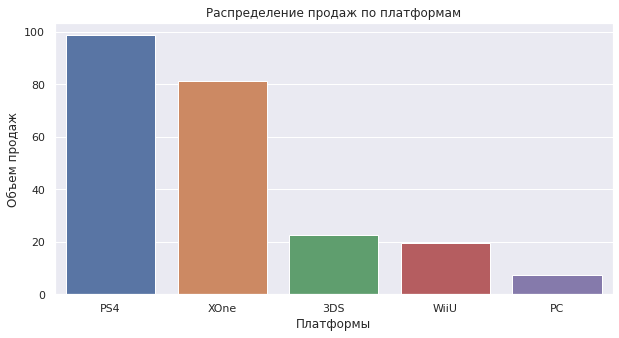

In [110]:
plot_region('platform','na_sales', 'Платформы', 'Объем продаж', 'Распределение продаж по платформам')

Наибольшую популярность в Северной Америке имеют PlayStation 4 и Xbox One с разницей между собой - 8% от общего объема продаж.

#### Популярность жанров

<AxesSubplot:xlabel='genre', ylabel='na_sales'>

,genre,na_sales,sales_fract
0,Shooter,66.29,0.33
1,Action,60.16,0.30
2,Sports,31.96,0.16
3,Role-Playing,29.74,0.15
4,Fighting,11.23,0.06


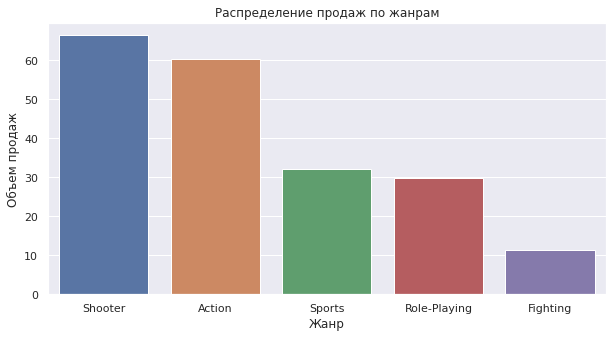

In [111]:
plot_region('genre','na_sales', 'Жанр', 'Объем продаж', 'Распределение продаж по жанрам')

Наибольшую популярность имеют игры жанра шутеры и экшен

#### Рейтинг ESRB

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

,rating,na_sales,sales_fract
0,M,82.23,0.36
1,RP,55.76,0.24
2,E,37.65,0.16
3,T,32.46,0.14
4,E10+,23.53,0.10


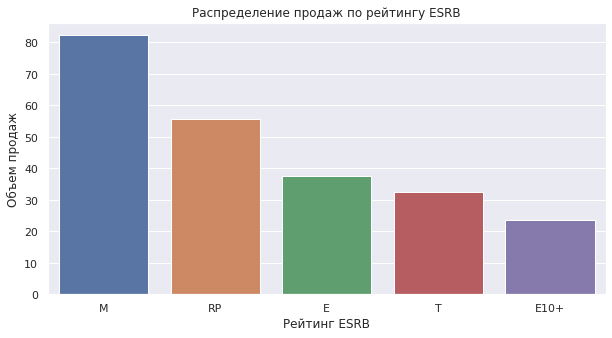

In [112]:
plot_region('rating','na_sales', 'Рейтинг ESRB', 'Объем продаж', 'Распределение продаж по рейтингу ESRB')

Наибольшая популярность у игры с неопределенным рейтингом и рейтингом M - 17+ 

### Европа

#### Популярность платформ

<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

,platform,eu_sales,sales_fract
0,PS4,130.04,0.58
1,XOne,46.25,0.21
2,PC,17.97,0.08
3,3DS,16.12,0.07
4,WiiU,13.15,0.06


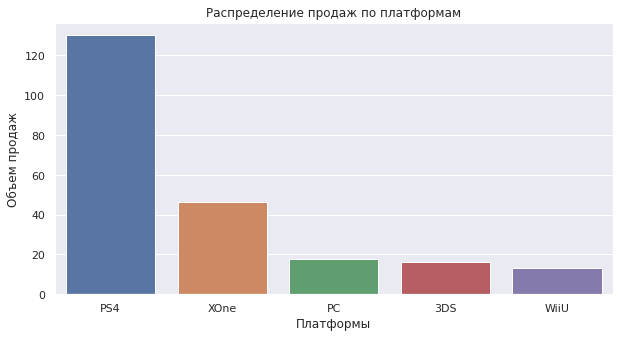

In [113]:
plot_region('platform','eu_sales', 'Платформы', 'Объем продаж', 'Распределение продаж по платформам')

Наибольшую популярность в Европе имеет платформа PlayStation 4 - 58% от европейского рынка.

#### Популярность жанров

<AxesSubplot:xlabel='genre', ylabel='eu_sales'>

,genre,eu_sales,sales_fract
0,Action,63.49,0.33
1,Shooter,56.23,0.29
2,Sports,33.48,0.17
3,Role-Playing,25.94,0.14
4,Racing,12.92,0.07


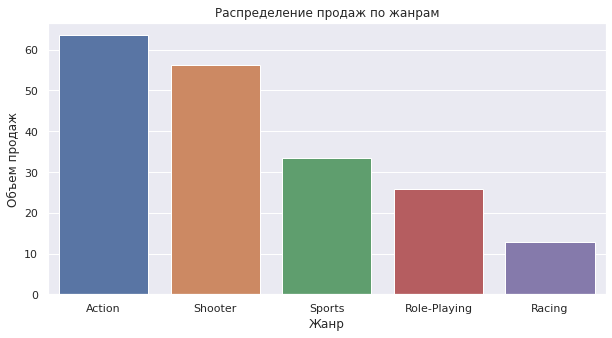

In [114]:
plot_region('genre','eu_sales', 'Жанр', 'Объем продаж', 'Распределение продаж по жанрам')

Наибольшая популярность у жанров экшен и шутер.

#### Рейтинг ESRB

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

,rating,eu_sales,sales_fract
0,M,82.38,0.36
1,RP,50.80,0.22
2,E,45.90,0.20
3,T,30.09,0.13
4,E10+,17.89,0.08


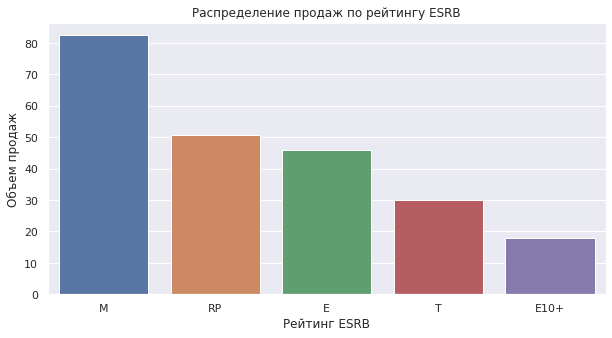

In [115]:
plot_region('rating','eu_sales', 'Рейтинг ESRB', 'Объем продаж', 'Распределение продаж по рейтингу ESRB')

Наибольшая популярность у игры с неопределенным рейтингом и рейтингом M - 17+ 

### Япония

#### Популярность платформ

<AxesSubplot:xlabel='platform', ylabel='jp_sales'>

,platform,jp_sales,sales_fract
0,3DS,44.24,0.54
1,PS4,15.02,0.18
2,PSV,14.54,0.18
3,WiiU,7.31,0.09
4,XOne,0.32,0.00


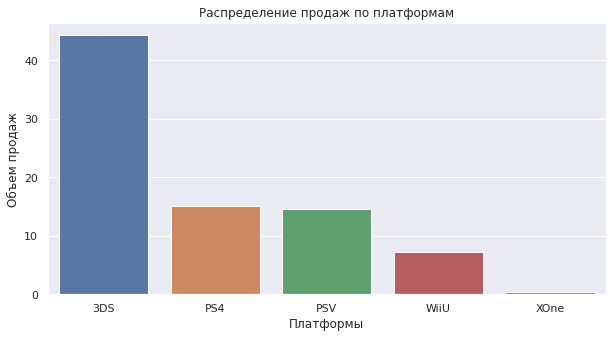

In [116]:
plot_region('platform','jp_sales', 'Платформы', 'Объем продаж', 'Распределение продаж по платформам')

Больше половины продаж игр приходится на Nintendo 3DS и Wii U. Весь остальной топ занимают платформы от PlayStation

#### Популярность жанров

<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

,genre,jp_sales,sales_fract
0,Role-Playing,28.70,0.42
1,Action,24.71,0.36
2,Misc,5.17,0.08
3,Fighting,5.01,0.07
4,Shooter,4.21,0.06


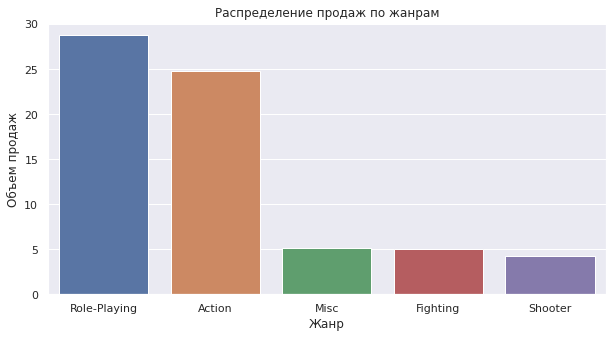

In [117]:
plot_region('genre','jp_sales', 'Жанр', 'Объем продаж', 'Распределение продаж по жанрам')

42% японского рынка занимают игры жанра RPG и 36% - экшен

#### Рейтинг ESRB

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

,rating,jp_sales,sales_fract
0,RP,50.43,0.62
1,T,11.99,0.15
2,E,8.29,0.10
3,M,6.40,0.08
4,E10+,4.32,0.05


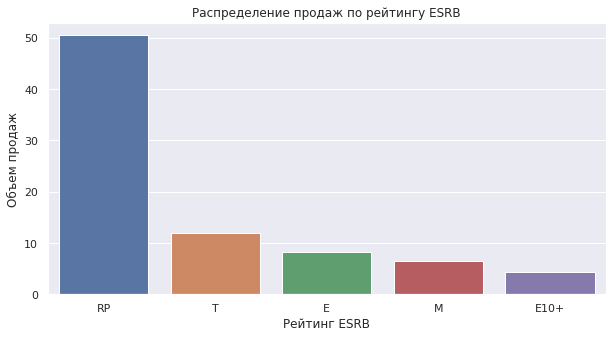

In [118]:
plot_region('rating','jp_sales', 'Рейтинг ESRB', 'Объем продаж', 'Распределение продаж по рейтингу ESRB')

Большинству игр не присвоена категория.

### Вывод

**Портрет северо-американского пользователя**

1. Пользователь PlayStation 4 / Xbox One;
2. Любитель жанров экшен, шутер;
3. Играет в игры с возрастным рейтингом M - 17+ или без рейтинга.

**Портрет европейского пользователя**

1. Пользователь  PlayStation 4;
2. Любитель жанров экшен, шутер;
3. Играет в игры с возрастным рейтингом M - 17+ или без рейтинга.

**Портрет японского пользователя**

1. Пользователь  игровых платформ японских производителей (в большинстве случаев мобильные консоли);
2. Любитель жанров RPG и Экшен;
3. Играет в игры с неопределенным возрастным рейтингом.

**Разница пользователей разных регионов**

Между пользователями северо-американского и европейского регионов разницы практически нет, за исключением игровой платформы - большинство европейцев предпочитает PlayStation 4, однако есть разница между ними и японскими пользователями. Так японские пользователи в большинстве случаев пользуются платформой отечественного производства, предпочитают жанры в стиле RPG и экшен.

## Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- **H0:** Средние пользовательские рейтинг платформ Xbox One и PC одинаковые. Если это так, то это позволит предуагадать пользовательский рейтинг игры, которая выходит сначала на платформе Xbox One.
- **H1:** Средний пользовательский рейтинг платформы Xbox One меньше, чем у PC. Если это так, то разработчик может быть уверен, что пользователи платформы PC будут довольны его продуктом.

In [119]:
df_actual_notnull = df_actual[df_actual['user_score'].notnull()]
alpha = 0.05
results = st.ttest_ind(df_actual_notnull[df_actual_notnull['platform'] == "XOne"]['user_score'],
                     df_actual_notnull[df_actual_notnull['platform'] == "PC"]['user_score'],
                     alternative = 'less')

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 0.9477474604032579
Не отвергаем нулевую гипотезу


Вероятность того, что пользовательская оценка игры на платформе Xbox One совпадет с пользовательской оценкой на платформе PC, составляет 95%.

### Гипотеза 2. Средние пользовательские рейтинги жанров экшен и спорт разные

- **H0:** Средние пользовательские рейтинги жанра экшен и спорт равны. Если они равны, то при наблюдении успеха одного из жанров можно разрабатывать другой.
- **H1:** Средние пользовательские рейтинги жанра экшен и спорт отличаются.

In [120]:
alpha = 0.05
results = st.ttest_ind(df_actual_notnull[df_actual_notnull['genre'] == "Action"]['user_score'],
                     df_actual_notnull[df_actual_notnull['genre'] == "Sports"]['user_score']
                      )

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 1.281270205370119e-10
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров экшен и спорт отличаются

## Вывод

### Изучение данных файлов

Были поставлены задачи по предобработке данных и исследовательскому анализу. Были обнаружены неопределенные значения, неправильный регистр в названии столбцов и выбросы.

### Подготовка данных

Названия столбцов были приведены к нижнему регистру. Были удалены записи с пропусками, так как их потеря не превышает оптимального уровня потери записей. Были заменены значения в столбцам на значения, удобные для анализа и не искажающие данные. Также были изменены форматы столбцов.

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные периоды

Были исследованы данные распределения количества выпускаемых игр по годам. Основной объем составили продукты, выпущенные с 2003-го по 2012-й год. В период до 2013-го повышение количества выпускаемых игр увеличивалось с выходом игровых платформ нового поколения.

После 2013-го происходит резкий спад количества выпускаемых игр в год. Предполагается, что это связано с доступом к новым технологиям, открывающим большие возможности для разработки больших проектов, требующих выделения больших ресурсов и времени.

Замечена зависимость объема выпускаемых игр на PC от количества выпускаемых игр на игровые консоли. Предполагается, что это связано с изначальной разработкой игр на игровые консоли с последующим портированием на PC.

#### Изменение продаж по платформам

Вплоть до 2012 года наблюдается повышение количества продаваемых копий. Затем происходит резкий спад, связанный с падением количества выпускаемых игр. Предполагается, что это произошло из-за того, что стали популярны большие проекты и бесплатные MMO-проект с внутренним игровым сервисом.

Выявлены продолжительности поддержки игровых платформ контентом. В основном, за исключением PC, платформы поддеживают от 3 до 10 лет. В среднем - 6 лет. Платформа PC является самой долгосуществующей, так как техническая конфигурация данной платформы может изменяться, в отличе от остальных платформ.

#### Актуальный период и платформы для анализа

На данный момент актуальным периодом является 2014-2016 года. Были определены актуальные платформы: PlayStation 4, Xbox One, 3DS, Wii U, Playstation Vita и PC.

#### Распределение продаж для актуального периода

Наибольшие продажи игр имеет платформа Xbox One (от 50 до 632 тыс. игровых копий, медианное число - 205 тыс. копий). Соизмеримо с ней PlayStation имеет от 57 до 690 тыс. игровых копий и медианное значение 185 тыс. копий. Для платформы PC продается от 20 до 200 тыс. игровых копий, а медианное число составляет 60 тыс. копий.

Совокупность предыдущих факторов говорит о том, что наибольшую популярность имеют стационарные консоли. Непопулярность выпуска игр на PC может заключаться в нежелании разработчиков выпускать продукцию на платформе, подверженной пиратству. Кроме того, техническая конфигурация PC менее доступна в ценовом эквиваленте, из-за чего аудитория данной платформы может быть не в состоянии позволить себе должную мощность для запуска новой продукции.

#### Влияние пользовательских отзывов и отзывов критиков на продажи Xbox One

Было установлено, что критики имеют нелинейное влияние на объем продаж игровой продукции. В то же время не установлено корреляции между пользовательскими отзывами и объемом продаж, за исключением случае с 3DS - игры на данной платформе имеют корреляцию между пользовательскими отзывами и объемом продаж. Динамика отзывов критиков для плафтормы 3DS соизмеримо с динамикой отзывов пользователей.

Данные зависимости были проверены на других актуальных платформах. Характер влияния отзывов на продажи остался прежним - в большинстве случаев влияние имеют отзывы критиков. Однако на платформе PC это влияние меньше, чем на других платформах, что может быть связано с отсутствием единой площадки для оценки.

#### Распределение продаж игр по жанрам

Больше всего продаж имеют шутеры и игры спортивного жанра. При этом у шутеров динамика продаж напрямую зависит от выхода крупных проектов. В жанре спорт бестселлеры выходят ежегодно.

Самым стабильным жанром является жанр RPG - количество выпускаемые крупных проектов не влияет на объем медианных продаж.

В жанре экшен выходит больше всего игр. Наибольшее количество продаж приходится на крупные проекты студий-гигантов.

### Портрет пользователя каждого региона

Было установлено, что портрет пользователя северо-американского и европейского регионов практически не отличается. Однако портрет японского пользователя имеет значительное отличие от предыдущих.

Северо-американский и европейский портреты:
1. Пользователи Xbox One и PlayStation 4 (для европейцев только Play Station 4);
2. Любители жанров экшен и шутер;
3. Возрастной рейтинг контента - M: 17+ или отсутствует.

В то же время японский портрет:
1. Пользователь игровых платформ японского производства;
2. Любитель жанров RPG и экшен;
3. Играет в игры с неопределенным возрастным рейтингом, что может быть связано с тем, что рейтинг ESRB, в основном, предназначен для игр, производимых на территории Северной Америки.

### Проверка гипотез

Были выведены и проверены гипотезы. По итогу проверки оказалось, что:
1. Вероятность того, что пользовательская оценка игры на платформе Xbox One совпадет с пользовательской оценкой на платформе PC, составляет 86%. Это говорит о том, что перенос разработчиком игры с консоли на персональный компьютер, с большой долей вероятности удовлетворит пользователей PC соизмеримо с удовлетворенностью пользователей Xbox One;
2. Было определено средний пользовательские рейтинги жанров экшен и спорт не совпадают